## Data Story

In this notebook, I will explore a subset of the data using the Los Angeles files and try to uncover some interesting initial trends and qualities of the Airbnb data. Since the reviews data only contains ID numbers and review text (which will be analyzed with machine learning later on in the project), I will be focusing on the listings data in this notebook.

In [1]:
# import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# show all columns
pd.set_option('display.max_columns', None)

In [3]:
# load the data
listings = pd.read_csv('/Users/limesncoconuts2/springboard_data/data_capstone_one/csv/los-angeles_listings.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,4,5,7,9,10,14,16,18,21,22,24,25,28,29,30,31,35,37,40,41,44,45,46,47,48,49,54,59,60,61,67,72,73,74,86,92,93,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
listings.head()

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee_USD,country,country_code,date_recorded,description,experiences_offered,extra_people_USD,first_review,guests_included,has_availability,host_about,host_acceptance_rate_percentage,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate_percentage,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,house_rules,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_nights,medium_url,minimum_nights,monthly_price_USD,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,picture_url,price_USD,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit_USD,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price_USD,xl_picture_url,zipcode
0,NaN,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",30.0,365,60,90.0,1,Real Bed,1,1,1.0,2015-07-28,6 months ago,moderate,Arcadia,10,United States,US,2015-07-25,安靜舒適的独立大套房. 阳光明媚的大卧室，(附帶冰箱)一个超大衣帽間和浴室. 提供免费无线高...,none,20,2014-09-15,1,True,NaN,100.0,True,20130073,False,False,1.0,PH,Cici,NaN,https://a2.muscache.com/ac/users/20130073/prof...,100,within a day,2014-08-16,https://a2.muscache.com/ac/users/20130073/prof...,1,https://www.airbnb.com/users/show/20130073,"['email', 'phone', 'reviews']",NaN,3890624,False,NaN,NaN,True,NaN,2014-11-02,2015-07-28,34.132812,NaN,https://www.airbnb.com/rooms/3890624,-118.025147,Los Angeles,1125.0,https://a0.muscache.com/ac/pictures/52102815/8...,1,NaN,"安靜舒適的独立大套房,非常适合专业商務人士，学生，实习，渡假遊學...",风景秀丽，豪宅林立，闹中取静，交通方便，华人超市!,NaN,Arcadia,NaN,无合约要求，适合短期旅游，探亲访友，随时拎包入住，,2.0,https://a0.muscache.com/ac/pictures/52102815/8...,90.0,House,False,False,False,10.0,10.0,8.0,10.0,10.0,90.0,8.0,0.19,Private room,2.015073e+13,NaN,NaN,安靜舒適的独立大套房. 阳光明媚的大卧室，(附帶冰箱)一个超大衣帽間和浴室.,NaN,CA,"South 2nd Avenue, Arcadia, CA 91006, United St...","我們j位於Arcadia市中心,非常适合专业商務人士，学生，渡假遊學...鄰近高速公路,餐厅...",https://a0.muscache.com/ac/pictures/52102815/8...,聚集高尔夫球场，网球场，大型购物中心，影院，图书馆，大型街心公园，跑马场，医院，诊所。非常便...,650.0,https://a0.muscache.com/ac/pictures/52102815/8...,91006.0
1,NaN,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30.0,365,60,90.0,1,Real Bed,1,1,1.0,2015-07-28,never,flexible,Los Angeles,NaN,United States,US,2015-07-25,Small but real clean apartment in Hancock Park...,none,0,NaN,1,True,"Clean & well educated, proffessional, mature",NaN,True,8786086,False,False,1.0,"Los Angeles, California, United States",Nick,Mid-Wilshire,https://a0.muscache.com/ac/users/8786086/profi...,NaN,NaN,2013-09-12,https://a0.muscache.com/ac/users/8786086/profi...,1,https://www.airbnb.com/users/show/8786086,"['email', 'phone']",NaN,1661292,False,NaN,NaN,True,NaN,NaN,2015-07-28,34.079586,NaN,https://www.airbnb.com/rooms/1661292,-118.341913,Los Angeles,1125.0,https://a2.muscache.com/ac/pictures/23837943/9...,1,NaN,Shared Small Well Decorated & Clean,NaN,Mid-Wilshire,Hancock Park,NaN,NaN,0.0,https://a2.muscache.com/ac/pictures/23837943/9...,75.0,Apartment,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shared room,2.015073e+13,NaN,NaN,NaN,NaN,CA,"North Sycamore Avenue, Los Angeles, CA 90036, ...",Small but real clean apartment in Hancock Park...,https://a2.muscache.com/ac/pictures/23837943/9...,NaN,500.0,https://a2.muscache.com/ac/pictures/23837943/9...,90036.0
2,NaN,6.0,"

The listings data has over 100 columns of information to analyze (see below), but in the case of predicting the price of a listing, we want to first look at the columns that pertain to attributes that we hypothesize will have the most influence on price.

In [5]:
list(listings.columns)

['access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee_USD',
 'country',
 'country_code',
 'date_recorded',
 'description',
 'experiences_offered',
 'extra_people_USD',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate_percentage',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate_percentage',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instant_bookable',
 'interaction',
 'is_business_travel_ready',
 'is_location_exact',
 'jurisdiction_na

The columns that I'm going to focus on to start forming this data narrative are:
- **bedrooms**, **bathrooms**, and **square_feet**
    - The number of bedrooms, bathrooms and square feet is indicative of the size of a house/apartment/etc., and we can hypothesize that larger, more expensive listings will have higher prices.
    
- **host_is_superhost**
    - Airbnb gives the superhost designation to hosts that demonstrate great service [(read more here)](https://www.airbnb.ca/help/article/829/how-do-i-become-a-superhost). Having a history of above average service may give hosts leverage to charge higher prices for their listings.

- **zipcode**
    - Different neighborhoods may have varying socioeconomic levels, which may lead some zipcodes to have more expensive prices than others.

- **property_type**
    - It's reasonable to expect that a house will have a higher price than an apartment, and that an apartment would have a higher price than a single room, etc.

Throughout this notebook, I will measure these attributes against **price_USD** and analyze any inital trends.

#### Interesting Counts in the Data

Let's start with a high level view of the data:

In [6]:
# total number of listings
print('There are', len(listings), 'Airbnb listings in Los Angeles.')

There are 620453 Airbnb listings in Los Angeles.


In [4]:
# change columns to numeric
listings.bedrooms = pd.to_numeric(listings.bedrooms, errors='coerce', downcast='integer')
listings.bathrooms = pd.to_numeric(listings.bathrooms, errors='coerce', downcast='float')

# average number of bedrooms and bathrooms
avg_bed = listings.bedrooms.mean()
avg_bath = listings.bathrooms.mean()
print('Los Angeles Airbnb listings have an average of', str(round(avg_bed,1)), 'bedrooms and', str(round(avg_bath,1)), 'bathrooms.')

Los Angeles Airbnb listings have an average of 1.4 bedrooms and 1.4 bathrooms.


In [8]:
# number of superhost listings vs. non-superhost listings
num_superhost = len(listings[listings.host_is_superhost == True])
num_not_superhost = len(listings) - num_superhost
print(num_superhost,'of Los Angeles Airbnb listings are hosted by superhosts, while', num_not_superhost,'are not.')

89248 of Los Angeles Airbnb listings are hosted by superhosts, while 531205 are not.


### Histograms

**What are people paying to stay a night in a Los Angeles Airbnb?**

The following hisotgrams show the distribution of nightly prices for Airbnbs in LA:

Text(0.5,1,'Distribution of listing prices in Los Angeles')

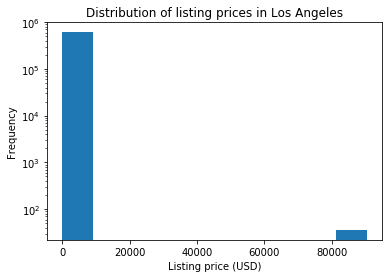

In [46]:
listings['price_USD'].plot(kind='hist', log=True)
plt.xlabel('Listing price (USD)')
plt.title('Distribution of listing prices in Los Angeles')

It's easy to see from the above plot, which is plotted on the logarithmic scale on the y-axis, that there are outliers in the price data. Let's plot the same histogram without the outliers:

Text(0.5,1,'Distribution of listing prices in Los Angeles')

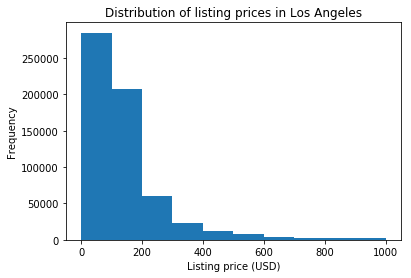

In [47]:
listings[listings['price_USD'] < 60000]['price_USD'].plot(kind='hist')
plt.xlabel('Listing price (USD)')
plt.title('Distribution of listing prices in Los Angeles')

The distribution of prices is clearly highly right skewed, with most of the listings being under $200 per night. However, there are a select few listing that are very expensive, including the outlier(s) that are not included in the above histogram.

### Barplots

Let's use barplots to explore how price interacts with some of the discrete variables in the listings dataset.

**How does location impact price?**

Now that we see the different prices people are paying, let's look into how those prices are distributed along other variables. For example, average listings prices most likely vary in different zipcodes. If we think of zipcodes as different neighborhoods, some are bound to be more upscale and closer to tourist attractions, while others will be more budget-friendly.

Since the dataframe includes some nonsensical zipcodes - let's cut it down to only include zipcodes in LA according to [this list of LA zipcodes](https://www.zip-codes.com/city/ca-los-angeles.asp):

In [27]:
# only Los Angeles zipcodes
la_zip = listings[(listings.zipcode > 90000) & (listings.zipcode < 90231)

In [29]:
# length of reduced dataframe
len(la_zip)

338463

Since accounting for LA zipcodes cut down the dataframe by almost half, it will probably be better to keep all rows, but turn nonsensical zipcodes to NaN values when cleaning the data for the machine learning algorithm.

Let's move forward with creating a pivot table with the reduced dataframe, which will show us the average nightly price per zipcode:

In [30]:
# listings per zipcode
avg_price_per_zipcode = la_zip.pivot_table(values='price_USD', index='zipcode', aggfunc='mean')

Since there are hundreds of zipcodes in LA, let's zoom in to the 10 zipcodes with the highest and lowest average listing prices:

In [61]:
# put head and tail together
ppz = pd.concat([avg_price_per_zipcode.head(), avg_price_per_zipcode.tail()]).sort_values(by='price_USD')

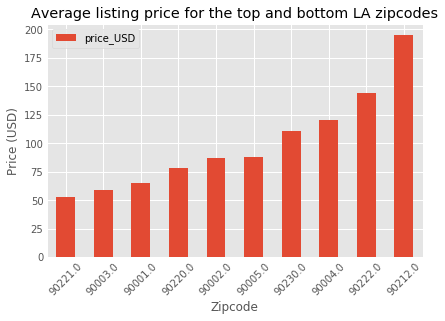

In [73]:
# plot zipcodes with highest and lowest average prices
ppz.plot(kind='bar')
plt.title('Average listing price for the top and bottom LA zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend(loc=None)
plt.style.use('ggplot')

The bar graph shows that the lowest prices are for zipcodes that correspond to lower-income areas like Compton (90221, 90220) and Florence-Graham (90001, 90002), which have median household income levels of about 30 thousand dollars. The highest prices are for zipcodes that correspond to high-income areas like Beverly Hills (90212), and Culver City (90230) which have median household incomes of 70-100 thousand dollars.

**How does the property type impact price?**

While certain zipcodes may be more expensive than others, prices likely also vary based on the nature of a listing itself. For example, it wouldn't make economic sense to charge the same for an urban apartment as a vacation home by the beach.

In addition, Airbnb is known for its unique accomodation options, which include boats, treehouses, and more. These specialty listings come with an extra 'wow' factor that may affect their price as well.

Upon inspection of the property type data, there are slight spelling differences for properties of the same kind. I will correct for his before plotting:

In [40]:
# number of each property type
listings['property_type'] = p_types['property_type'].str.replace('Bed and breakfast', 'Bed & Breakfast').str.replace('Casa particular (Cuba)', 'Casa particular').str.replace('Earth house', 'Earth House')
price_per_prop = listings.pivot_table(values='price_USD', index='property_type', aggfunc='mean')

Like for the zipcode data, it will be easier to inspect the ten property types that have the highest and lowest average price:

In [69]:
# put head and tail together
ppp = pd.concat([price_per_prop.head(), price_per_prop.tail()]).sort_values(by='price_USD')

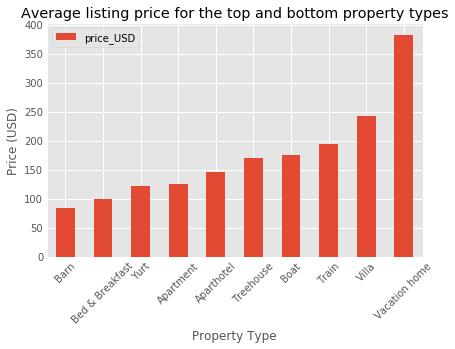

In [72]:
# plot property types with highest and lowest average prices
ppp.plot(kind='bar')
plt.title('Average listing price for the top and bottom property types')
plt.xlabel('Property Type')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend(loc=None)
plt.style.use('ggplot')

The bar graph shows that barns, bed and breakfasts, and appartments have the lowest average price, while more specialty proprety types like boats, trains, villas, and vacation homes are the most expensive. Vacation homes, in fact, are almost $150 more expensive on average than the next more expensive property type, Villa.

**Are listings with more bedrooms and/or bathrooms more expensive?**

Listings with more bedrooms and bathrooms can accomodate more people, and therefore may have higher nightly prices. Let's see if this is actually the case.

**Bedrooms:**
Like in the previous bar plots, we'll use a pivot table to calculate the average price per number of bedrooms. We will also do the same for the number of bathrooms:

Text(0,0.5,'Price (USD)')

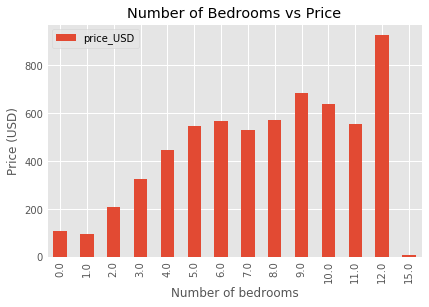

In [77]:
# pivot table for average price per number of bedrooms
price_per_bed = listings.pivot_table(values='price_USD', index='bedrooms', aggfunc='mean')

# plot the pivot table
price_per_bed.plot(kind='bar')
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price (USD)')

While the average price tends to increase as the number of bedrooms in a listing increases, it is not a clear trend. Additionally, it's worth looking into the details for the listing that has 15 bedrooms, as it seems to have a very low price and might be a bad or fradulent listing.

**Bathrooms:**

Text(0,0.5,'Price (USD)')

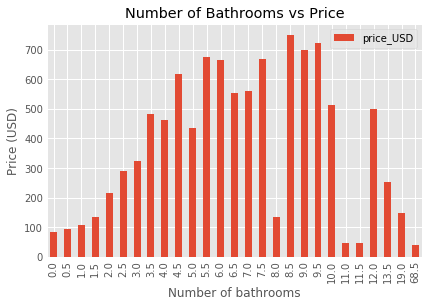

In [78]:
# pivot table for average price per number of bathrooms
price_per_bath = listings.pivot_table(values='price_USD', index='bathrooms', aggfunc='mean')

# plot the pivot table
price_per_bath.plot(kind='bar')
plt.title('Number of Bathrooms vs Price')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price (USD)')

The number of bathrooms doesn't have a clear trend with respect to price. In fact, it looks more like a normal distribution than an increasing or decreasing trend.

### Scatterplots

**Does the size of a listing property impact its price?**

Square footage is a continuous variable that is worth exploring in conjunction with price. In the same vein as our logic for bedrooms and bathrooms, it's reasonable to think that a listing with higher square footage and more space will have higher prices. Let's explore this with a regression plot that will show us the data points of a sqft vs. price scatterplot along with a regression line showing the general trend in the data.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-2.575,0.5,'Price (USD)')

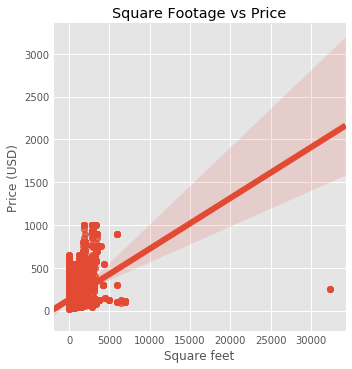

In [88]:
# plot square feet vs. price with regression
sns.lmplot(x='square_feet', y='price_USD', data=listings)
plt.title('Square Footage vs Price')
plt.xlabel('Square feet')
plt.ylabel('Price (USD)')

The square footage data clearly has an outlier at about 32,500 square feet. This makes it harder to see trends in the rest of the data, so let's plot without this point:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1100)

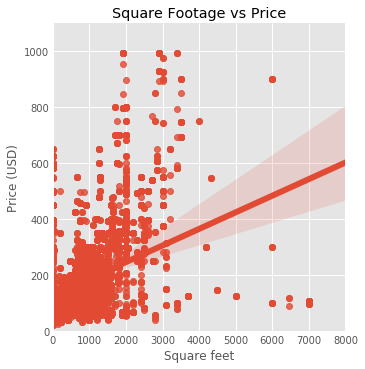

In [87]:
sns.lmplot(x='square_feet', y='price_USD', data=listings)
plt.title('Square Footage vs Price')
plt.xlabel('Square feet')
plt.ylabel('Price (USD)')
plt.xlim(0,8000)
plt.ylim(0,1100)

Without the outlier, the regression plot suggests a positive trend in the data, with more square footage corresponding to higher prices. However, the data itself is so spread out that this trend may have little actual influence in the grander scheme of things.

### Conclusions

The trends and relationships uncovered in this notebook lead us to a few conclusions/ideas for further exploration as we move forward with this project's analyses:

1. The data needs to be thouroughly inspected to make sure there are no slight differences in spelling or notation that leads to inaccurate analyses (like in the case of the 'property_type' column) or data that does not make sense( like in the 'zipcode' column).

2. It will be important to inspect outliers in the dataset to see if they are real or fraudulent listings. It might be worth it to check them against the Airbnb website. It's too good to be true that a listing with 15 bedrooms would be one of the cheapest out there.

3. There is a lot of interesting geographic variability in prices, and this may influence price more than other aspects of the data. On the other end of the spectrum, attributes that I thought would have more influence, like number of bathrooms and square footage, are not as strong as expected.

4. It will be interesting to see if there are any NLP techniques that might be applied to the text data that describes the listings, in addition to using NLP on each listings reviews.

5. Columns like 'amenities' should be encoded so that they can be analyzed more. A listing's features such as TV, Internet access, and breakfast may strongly impact its price.

### Hypothesis Moving Forward:

An Airbnb listing's nightly price will be most affected by:
    - Its geographical location
    - The type of property it is, and
    - The amenities provided

**NOTE ABOUT TIMESERIES:** Despite this data including several columns containing dates such as **host_since** and **last_review**, none of the attributes in the dataset are time dependent. Therefore, timeseries plots would not be appropriate for this analysis (at least at this point in time).